In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("model/")
from diffusion import GaussianDiffusion, DiffusionImageAPI
import torch
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt


In [3]:
from PIL import Image
import requests

url = "https://www.themoviedb.org/t/p/w1280/6oom5QYQ2yQTMJIbnvbkBL9cHo6.jpg"
image = Image.open(requests.get(url, stream=True).raw)
w, h = image.size
image = image.resize((w // 16, h // 16))
#image = image.resize((16, 16))
w, h = image.size
print(f"[{w}x{h}]")
image
image.save("./test.jpg")


[80x120]


In [4]:
NOISE_STEPS = 4000
MODEL = None
BETA_0 = 1e-4
BETA_T = 0.2
IMAGE_SIZE = (w,h)


diffusion_cos = GaussianDiffusion(
  model=MODEL,
  noise_steps=NOISE_STEPS,
  beta_0=BETA_0,
  beta_T=BETA_T,
  image_size=IMAGE_SIZE,
  schedule="cosine"
)
diffusion_lin = GaussianDiffusion(
  model=MODEL,
  noise_steps=NOISE_STEPS,
  beta_0=BETA_0,
  beta_T=BETA_T,
  image_size=IMAGE_SIZE,
  schedule="linear"
)

diffusion_sig = GaussianDiffusion(
  model=MODEL,
  noise_steps=NOISE_STEPS,
  beta_0=BETA_0,
  beta_T=BETA_T,
  image_size=IMAGE_SIZE,
  schedule="sigmoid"
)


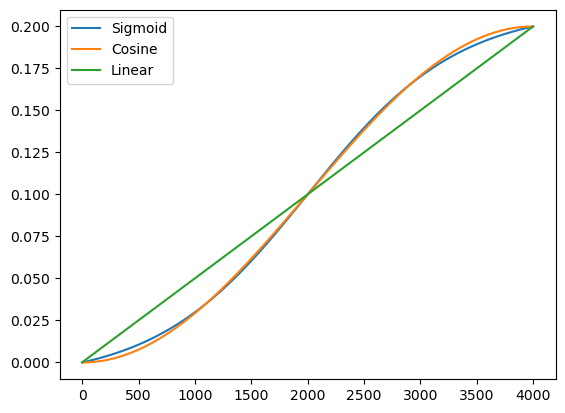

In [5]:
#print(diffusion_lin.betas)
a = diffusion_sig.betas
b = diffusion_cos.betas
c = diffusion_lin.betas
#print(a)
#print(b[100])


plt.plot(range(NOISE_STEPS),a)
plt.plot(range(NOISE_STEPS),b)
plt.plot(range(NOISE_STEPS),c)

plt.legend(["Sigmoid","Cosine","Linear"])
plt.show()


20


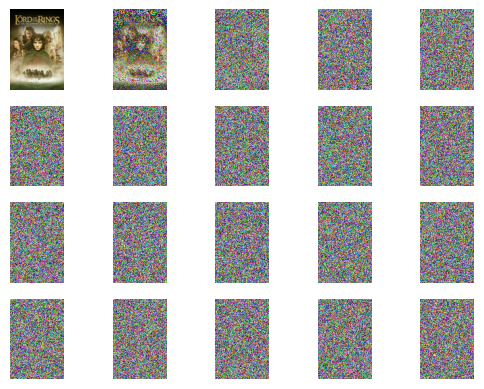

In [7]:
imageAPI = DiffusionImageAPI(diffusion_cos)
timesteps = np.linspace(0, 3999, 20).astype(int)
#print(timesteps)

images = imageAPI.get_noisy_images(image, time_steps=timesteps)
print(len(images))
for i in range(len(images)):
  plt.subplot(4, 5, i + 1)
  plt.imshow(images[i])
  plt.axis("off")


In [34]:
len(torch.Size([2, 1, 120, 80, 3]))


5

In [21]:
image = image_copy
image = torch.from_numpy(np.array(image))
image = diffusion.normalize_image(image)
t = diffusion.sample_time_steps(1)
print(t)
image = diffusion.apply_noise(image, t)
imageAPI.tensor_to_image(diffusion.denormalize_image(image.squeeze(0)))


tensor([251])
Value of t tensor([251])


AttributeError: 'tuple' object has no attribute 'squeeze'